# **[The Sparks Foundation (TSF)](https://www.thesparksfoundationsingapore.org/) - Graduate Rotational Internship Program (GRIP) January 2022**

# **Data Science and Business Analytics Internship**

## **Author - Abhishek Kakade**

---



## **Task 6 - Prediction Using Decision Tree Algorithm (*Level - Intermediate*)**

## **The objective of this task is to develop a decision tree classification algorithm to classify Iris flower into 3 categories based on their species.**

### ***Importing Libraries***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### ***Loading data***

In [2]:
file_path = "./drive/MyDrive/TSF_GRIP_INTERNSHIP_2022/DATASET/Iris.csv"
dataset = pd.read_csv(file_path, index_col = "Id")

### ***Shape of dataset***

In [3]:
dataset.shape

(150, 5)

### ***Columns in dataset***

In [4]:
dataset.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### ***How many number of unique species?***

In [5]:
dataset["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

As we can see there are 3 different species we're going to classify using machine learning.
### ***Now we find what is the frequency of each unique species in dataset i.e. how many times each species occurs in the dataset***

In [6]:
print("Frequency of Iris-virginica, Iris-versicolor and Iris-setosa are as follows, \n")
print(dataset["Species"].value_counts())

Frequency of Iris-virginica, Iris-versicolor and Iris-setosa are as follows, 

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64


There are total 150 datapoints and 50 values for each species. So the dataset is called balanced dataset as there is equal number of features for each species.

### ***Scatter Plot***

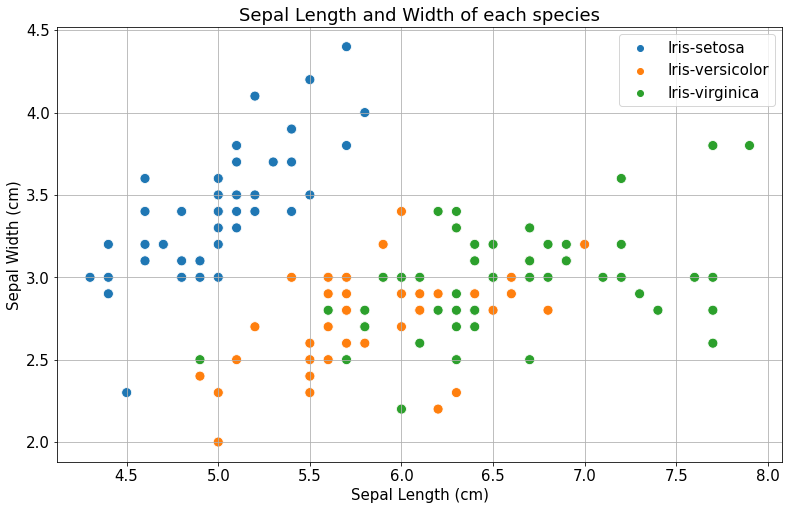

In [7]:
plt.figure(figsize = (13, 8))
plt.rcParams.update({'font.size': 15})
plt.title("Sepal Length and Width of each species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
sns.scatterplot(x = dataset["SepalLengthCm"], y = dataset["SepalWidthCm"], hue = dataset["Species"], s = 100)
plt.grid()
plt.legend()
plt.show()


Observation - It is clearly seen that Setosa species can be classified from other species by drawing a straight line. And Versicolor and Virginica species cannot be classified by drawing a straight line.

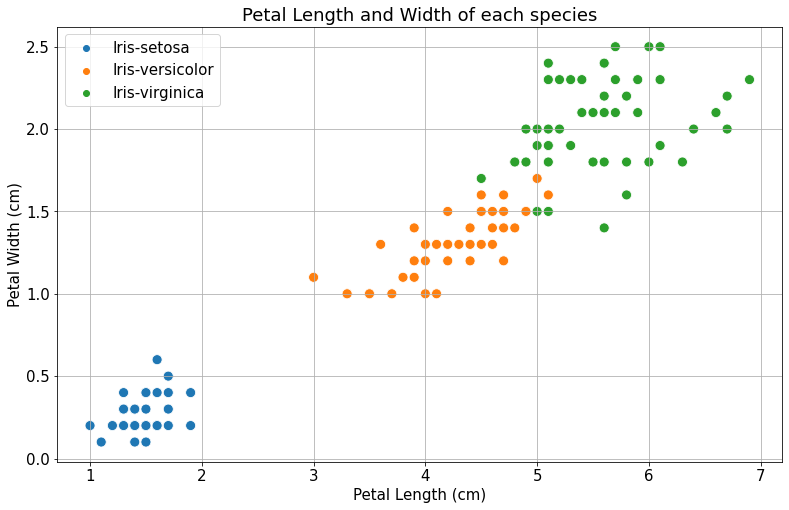

In [8]:
plt.figure(figsize = (13, 8))
plt.rcParams.update({'font.size': 15})
plt.title("Petal Length and Width of each species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
sns.scatterplot(x = dataset["PetalLengthCm"], y = dataset["PetalWidthCm"], hue = dataset["Species"], s = 100)
plt.grid()
plt.legend()
plt.show()


Observation - By using "PetalLengthCm" and "PetalWidthCm" as features, we can classify Setosa species even by using if/else statements! It is now easier to classify Setosa species from other two.

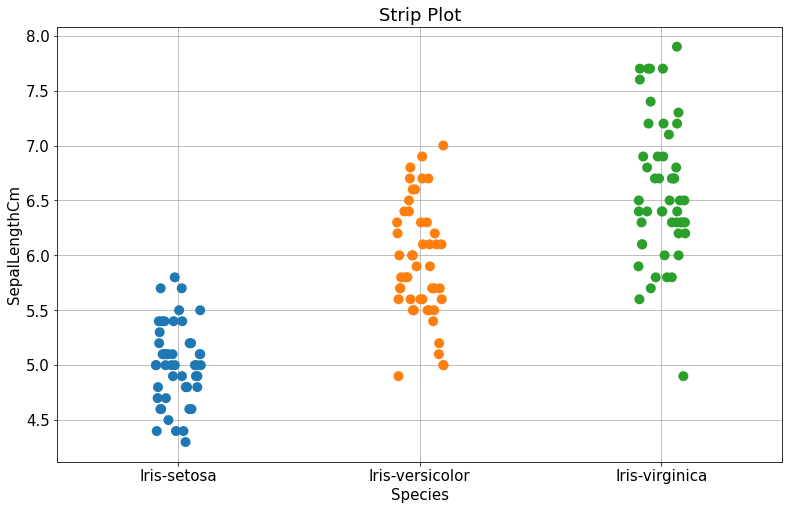

In [9]:
plt.figure(figsize = (13, 8))
plt.title('Strip Plot')
plt.ylabel("Sepal Length in cm")
plt.rcParams.update({'font.size': 15})
ax = sns.stripplot(x='Species', y='SepalLengthCm', data=dataset, s = 10)
plt.grid()


Observation - This plot gives information about how iris species are related to each other only by using sepal length. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


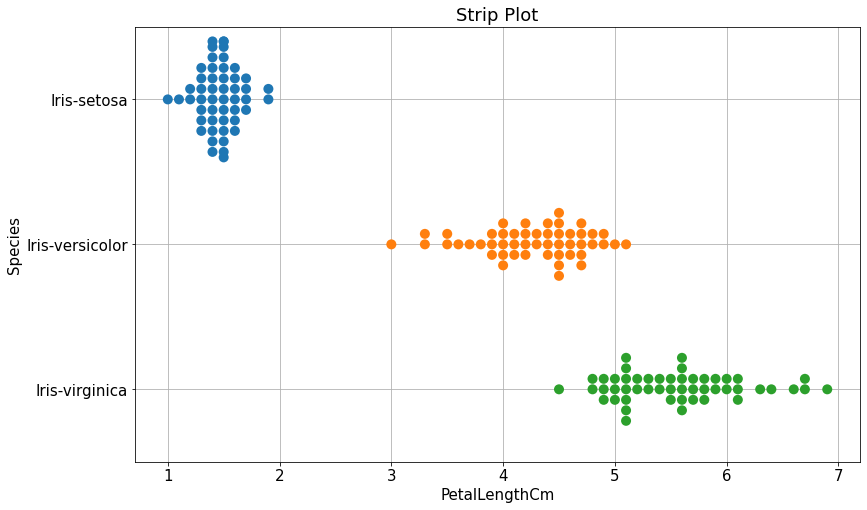

In [10]:
plt.figure(figsize = (13, 8))
plt.title('Strip Plot')
plt.xlabel("Petal Length in cm")
plt.rcParams.update({'font.size': 15})
ax = sns.swarmplot(x='PetalLengthCm', y='Species', data=dataset, s = 10)
plt.grid()

Observation - This plot gives information about how iris species are related to each other only by using petal lengths of flowers. The Versicolor and Virginica species are colliding with each other a little, but Setosa is clearly has its petal lenght <2cm.

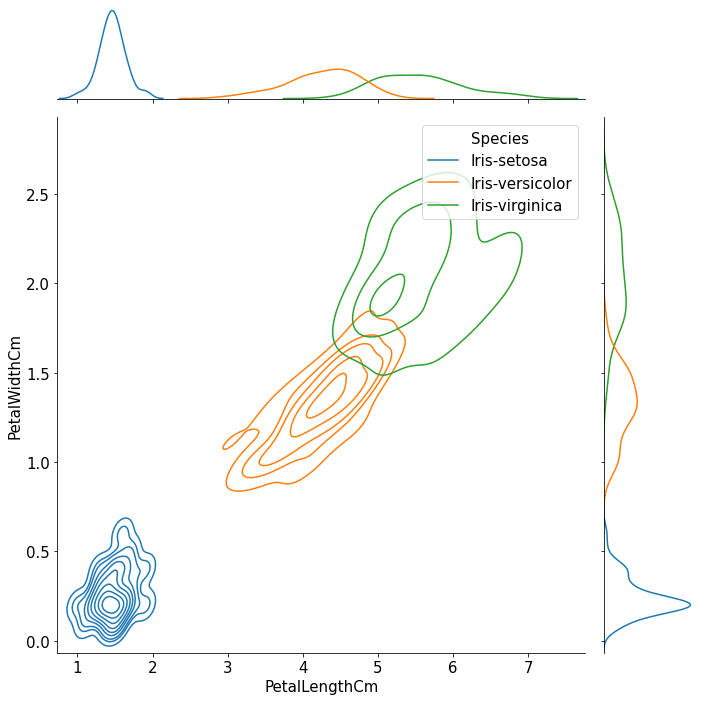

In [11]:
sns.jointplot(data=dataset, x="PetalLengthCm", y="PetalWidthCm", hue="Species", height = 10, kind = "kde")

Observation - 

### ***Pair Plots***

<Figure size 504x504 with 0 Axes>

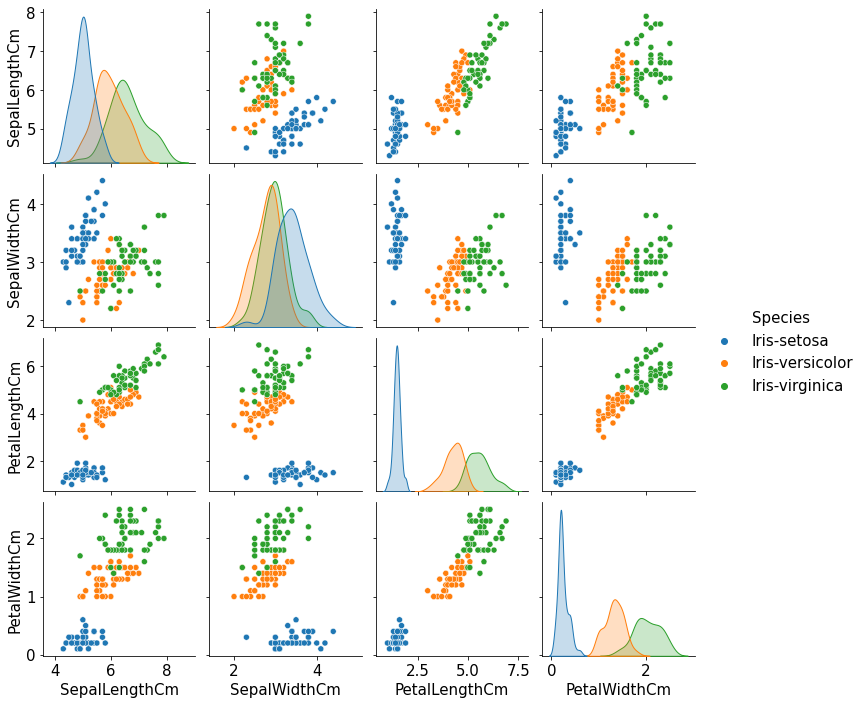

In [12]:
plt.figure(figsize = (7, 7))
plt.rcParams.update({'font.size': 15})
sns.pairplot(dataset, hue = "Species")
plt.grid()
plt.show()


Observation - 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

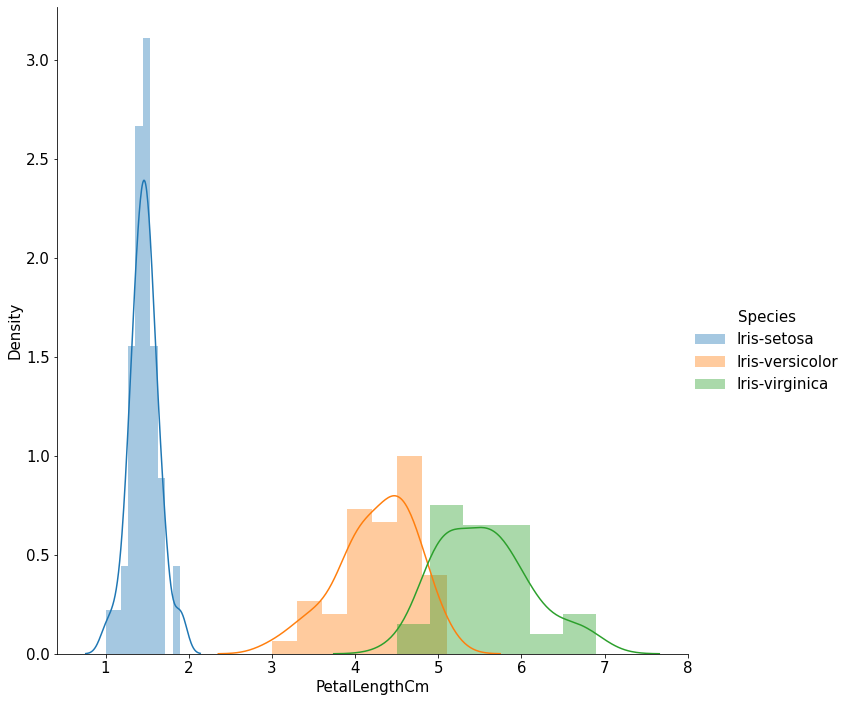

In [13]:
sns.FacetGrid(dataset, hue = "Species", height = 10).map(sns.distplot, "PetalLengthCm").add_legend()
plt.show()

Observation - 

### ***Summary statistics of data***

In [14]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 12.0+ KB


In [16]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
dataset.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


### ***Feature Engineering***

In [18]:
"""

  Adding two more columns 

  PetalToSepalLengthRatio = Petal length / Sepal Length
  PetalToSepalWidthRatio = Petal Width / Sepal Width
  
"""
dataset["PetalToSepalLengthRatio"]= dataset["PetalLengthCm"]/dataset["SepalLengthCm"]
dataset["PetalToSepalWidthRatio"] = dataset["PetalWidthCm"]/dataset["SepalWidthCm"]
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalToSepalLengthRatio,PetalToSepalWidthRatio
Id,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0.274510,0.057143
2,4.9,3.0,1.4,0.2,Iris-setosa,0.285714,0.066667
3,4.7,3.2,1.3,0.2,Iris-setosa,0.276596,0.062500
4,4.6,3.1,1.5,0.2,Iris-setosa,0.326087,0.064516
5,5.0,3.6,1.4,0.2,Iris-setosa,0.280000,0.055556


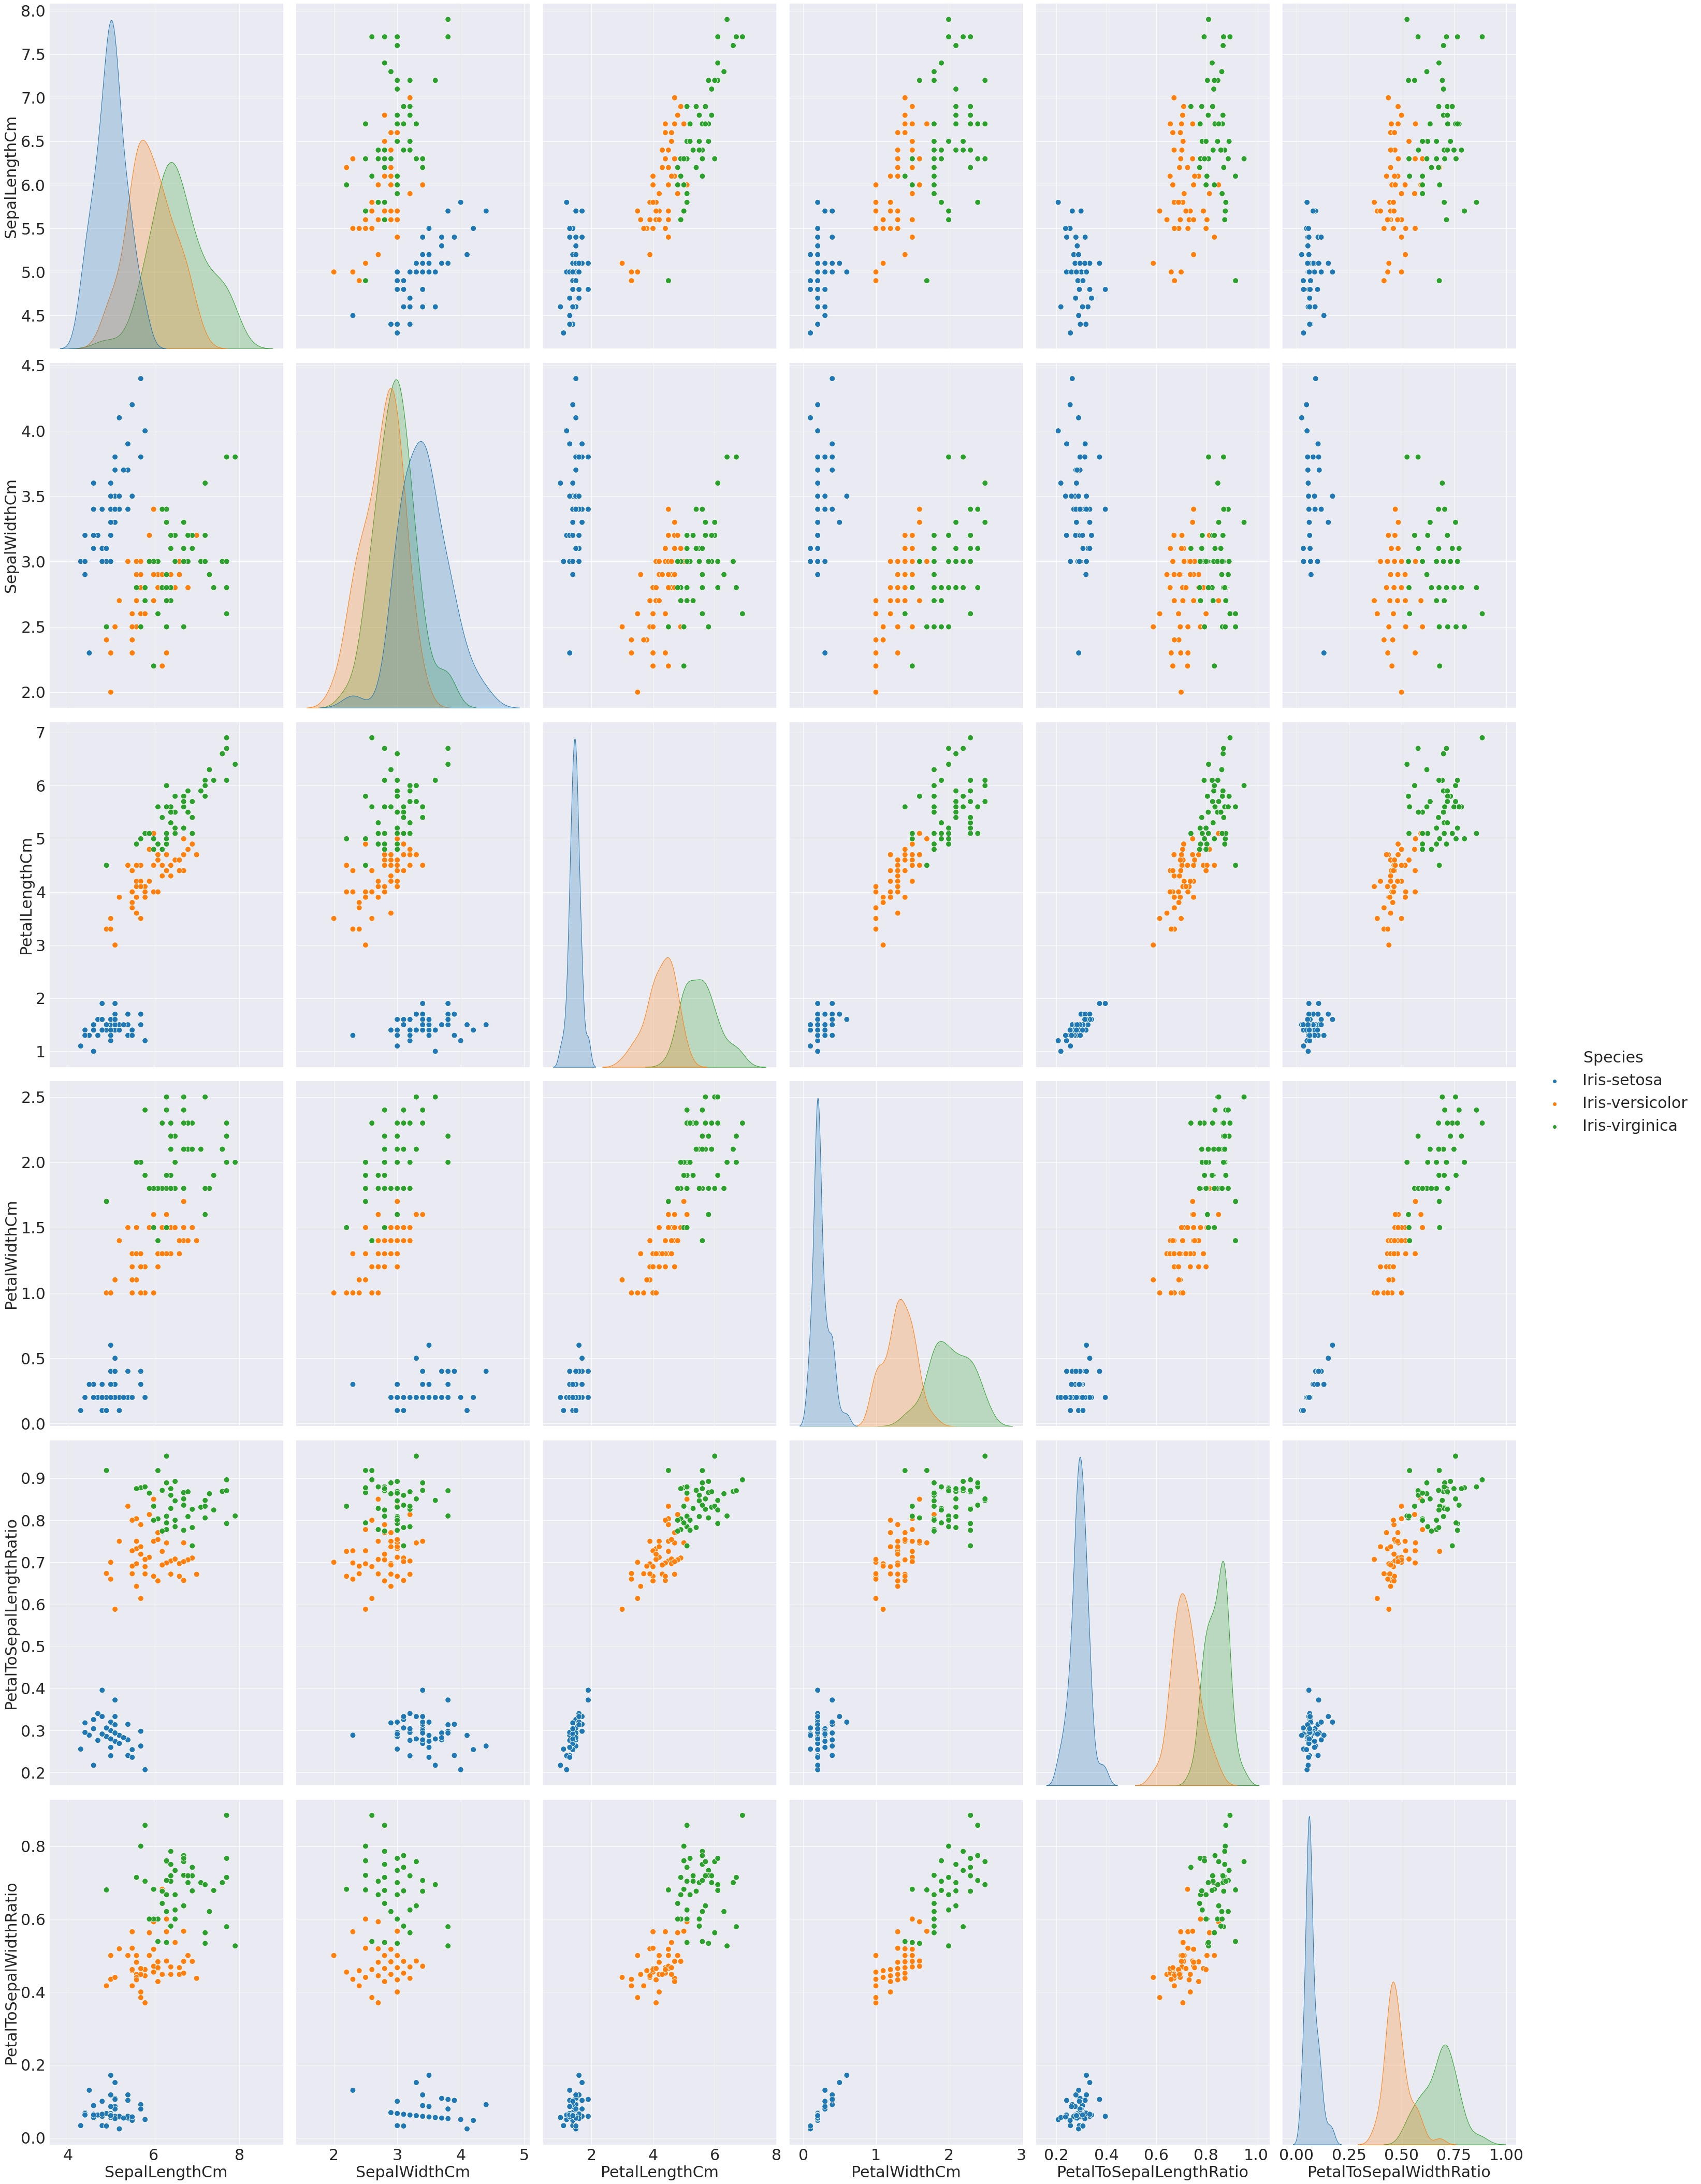

In [19]:
sns.set_style(style="darkgrid")
plt.rcParams.update({'font.size': 30})
sns.pairplot(dataset, hue = "Species", height=10, aspect = 0.7, plot_kws={"s": 120})

## **Building Decision Tree classification model**

### ***Shuffling the dataset***

In [20]:
dataset = dataset.sample(frac =1)

### ***Separating features and label from DataFrame***

In [21]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalToSepalLengthRatio,PetalToSepalWidthRatio
Id,,,,,,,
67,5.6,3.0,4.5,1.5,Iris-versicolor,0.803571,0.500000
87,6.7,3.1,4.7,1.5,Iris-versicolor,0.701493,0.483871
94,5.0,2.3,3.3,1.0,Iris-versicolor,0.660000,0.434783
62,5.9,3.0,4.2,1.5,Iris-versicolor,0.711864,0.500000
26,5.0,3.0,1.6,0.2,Iris-setosa,0.320000,0.066667


In [22]:
column_feature_names = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "PetalToSepalLengthRatio", "PetalToSepalLengthRatio"]

features = dataset[column_feature_names]

column_label_name = ["Species"]

labels = dataset[column_label_name]

In [23]:
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,PetalToSepalLengthRatio,PetalToSepalLengthRatio
Id,,,,,,
67,5.6,3.0,4.5,1.5,0.803571,0.803571
87,6.7,3.1,4.7,1.5,0.701493,0.701493
94,5.0,2.3,3.3,1.0,0.660000,0.660000
62,5.9,3.0,4.2,1.5,0.711864,0.711864
26,5.0,3.0,1.6,0.2,0.320000,0.320000


In [24]:
labels.head()

,Species
Id,
67,Iris-versicolor
87,Iris-versicolor
94,Iris-versicolor
62,Iris-versicolor
26,Iris-setosa


### ***Converting string values to numerical values***

In [25]:
labelencoder = LabelEncoder()
labels = labelencoder.fit_transform(labels)
print(labels)

[1 1 1 1 0 2 1 2 2 1 1 1 2 0 1 2 0 1 0 1 2 0 2 1 2 2 1 0 0 2 1 2 0 2 2 2 1
 1 1 0 0 0 0 0 2 2 0 0 2 1 0 1 2 0 1 1 0 0 2 0 2 2 1 0 1 2 1 1 0 1 0 1 0 2
 0 0 0 2 2 2 2 0 2 2 0 0 2 1 0 0 0 1 2 2 2 0 1 1 2 2 1 2 2 1 1 1 0 0 2 0 0
 2 1 2 2 0 1 0 1 2 0 1 0 0 0 2 1 2 1 2 2 0 1 0 0 1 1 1 1 2 2 1 0 2 0 2 1 0
 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


here,

1.   Iris Setosa is encoded as number 0
2.   Iris Versicolor is encoded as number 1 
3.   Iris Virginica is encoded as number 2



### ***Splitting data into training and testing data***

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20)
print(len(X_train))
print(len(X_test))

120
30


### ***Creating decision tree classifier and train it on training data***

In [27]:
dtc = DecisionTreeClassifier()

In [28]:
model = dtc.fit(X_train, y_train)

### ***Test the classifier on test data***

In [29]:
y_pred = dtc.predict(X_test)

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


**Accuracy: 90.00%**

### ***Confusion matrix***

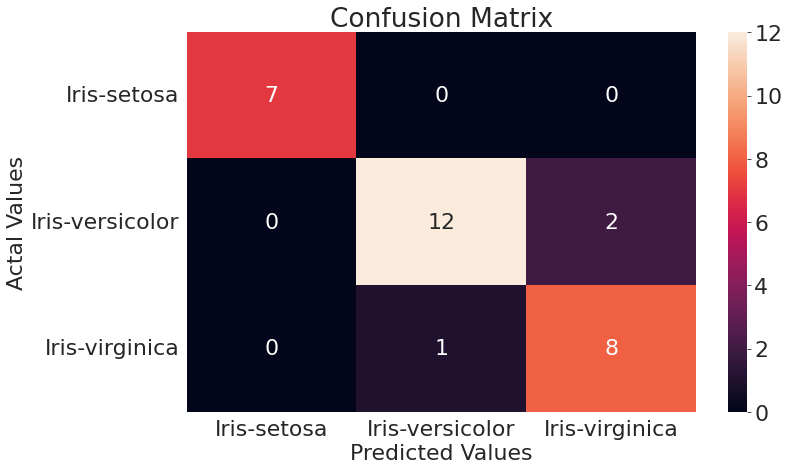

In [38]:
cm = confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"], 
                     columns = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

#Plotting the confusion matrix
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12,7))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

### ***Visualizing decision tree classifier***

In [39]:
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_5 <= 0.50
|   |--- class: 0
|--- feature_5 >  0.50
|   |--- feature_3 <= 1.55
|   |   |--- feature_5 <= 0.82
|   |   |   |--- class: 1
|   |   |--- feature_5 >  0.82
|   |   |   |--- class: 2
|   |--- feature_3 >  1.55
|   |   |--- feature_5 <= 0.76
|   |   |   |--- feature_5 <= 0.74
|   |   |   |   |--- class: 2
|   |   |   |--- feature_5 >  0.74
|   |   |   |   |--- class: 1
|   |   |--- feature_5 >  0.76
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_1 <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- class: 2



In [40]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

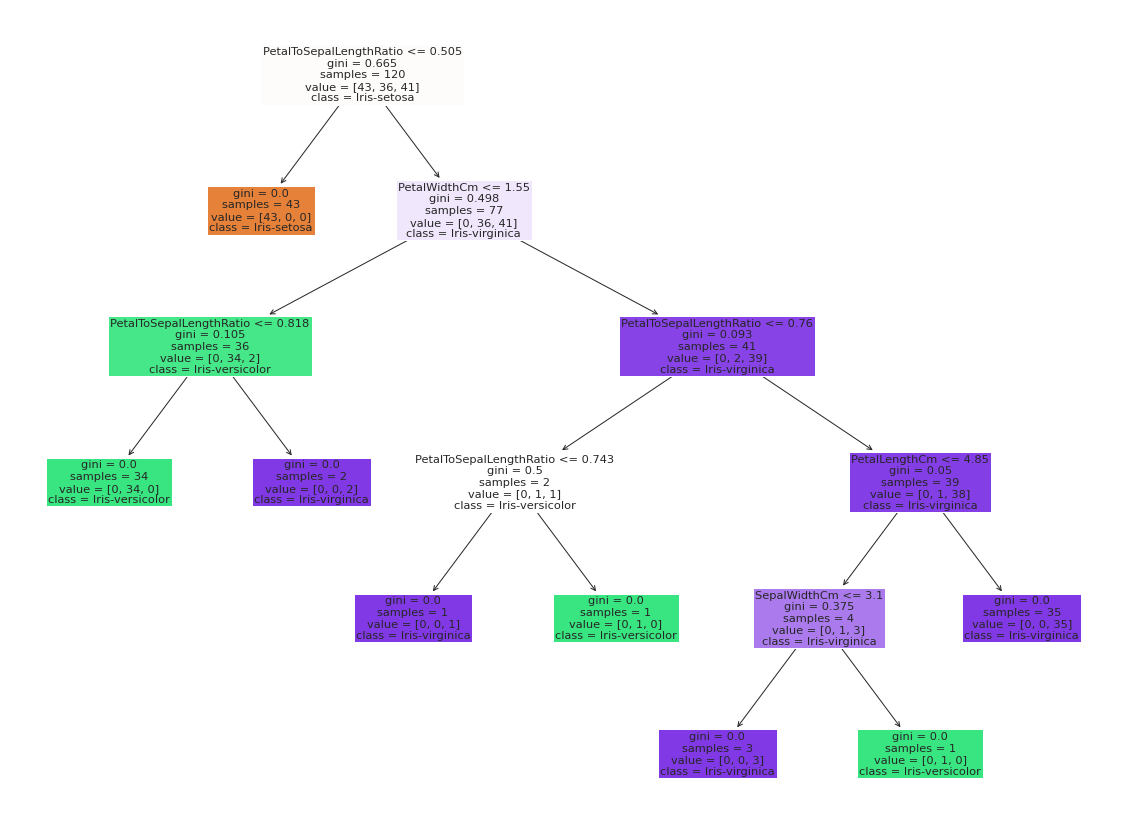

In [41]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(dtc, 
                   feature_names=list(dataset.columns),  
                   class_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
                   filled=True)


In [42]:
fig.savefig("decistion_tree_png.png")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


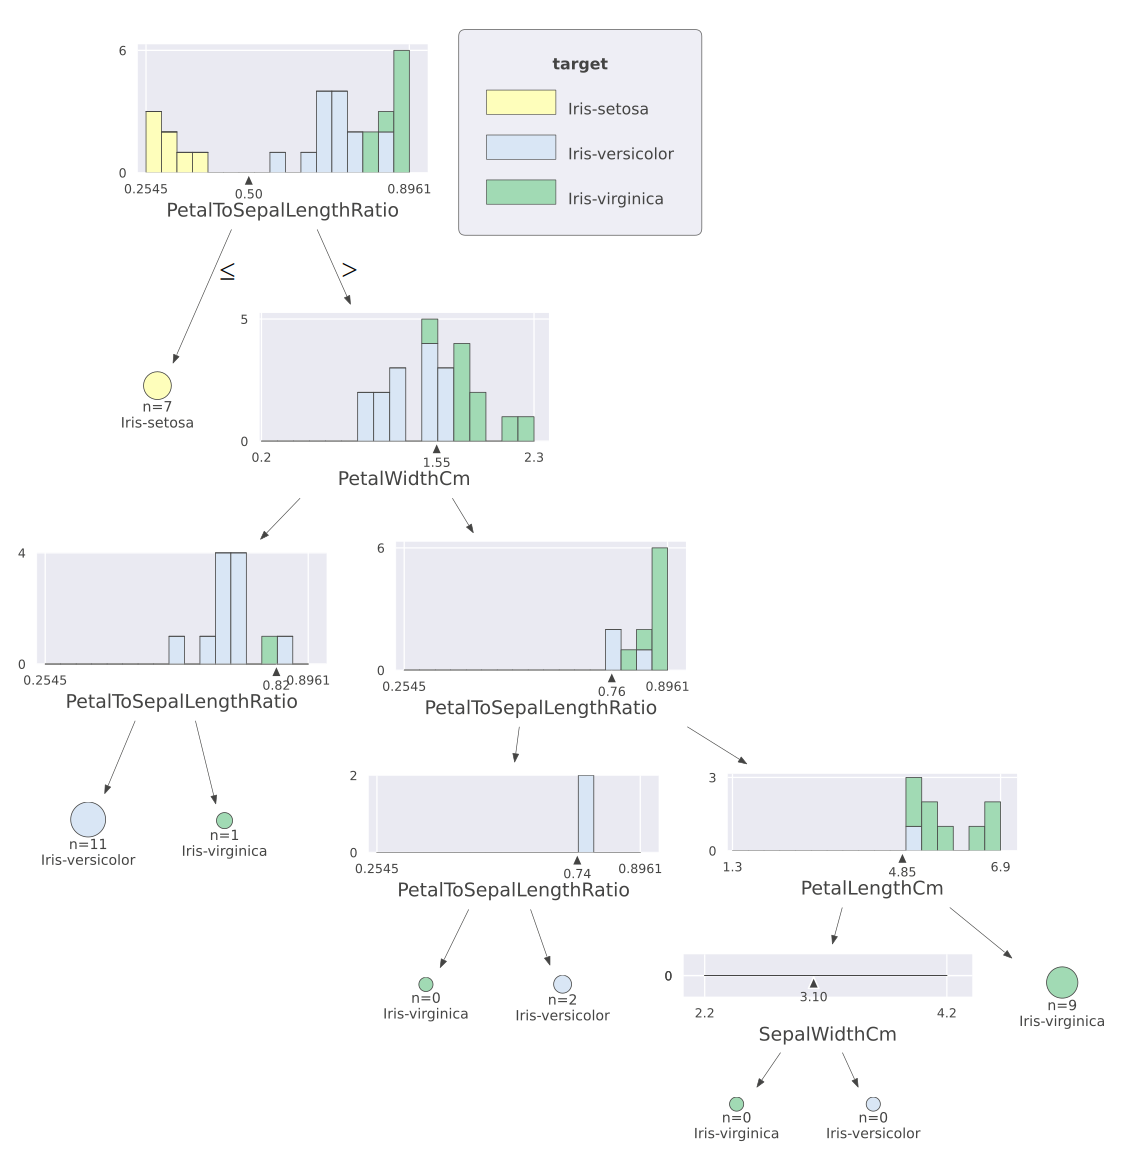

In [46]:

from dtreeviz.trees import dtreeviz # remember to load the package
viz = dtreeviz(dtc, X_test, y_test,
                target_name="target",
                feature_names=list(dataset.columns),
                class_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"], scale=2.1)

viz


In [45]:
viz.save("decision_tree.svg")

# **Conclusion**

---



**Thus I've successfully classified all 3 Iris flower species viz. Setosa, Versicolor and Virginica with accuracy of 90.00%. By observing confusion matrix we can see that the algorithm is accurately classifying the Setosa species but is not able to classify Virginica and Versicolor species comparatively.**

# **Thank You!**



---

